# Titanic

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import os

# import titanic_disaster_packages

In [3]:
import warnings

import matplotlib.pyplot as plt  # <-- Data visualization
import numpy as np  # <-- Linear algebra
import pandas as pd  # <-- Data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # <-- Data visualization

warnings.filterwarnings('ignore')

sns.set_theme(context='notebook', palette='pastel', style='whitegrid')

plt.style.use('fivethirtyeight')

/tmp/ipykernel_13138/1785251300.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # <-- Data processing, CSV file I/O (e.g. pd.read_csv)


## Load Dataset

In [4]:
df = pd.read_csv('../data/train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Exploratory Data Analysis (EDA)

In [7]:
# Checking for total null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The columns of `Age = 177, Cabin = 687 y Embarked = 2` have null values. I will try to fix them.

How many survived?

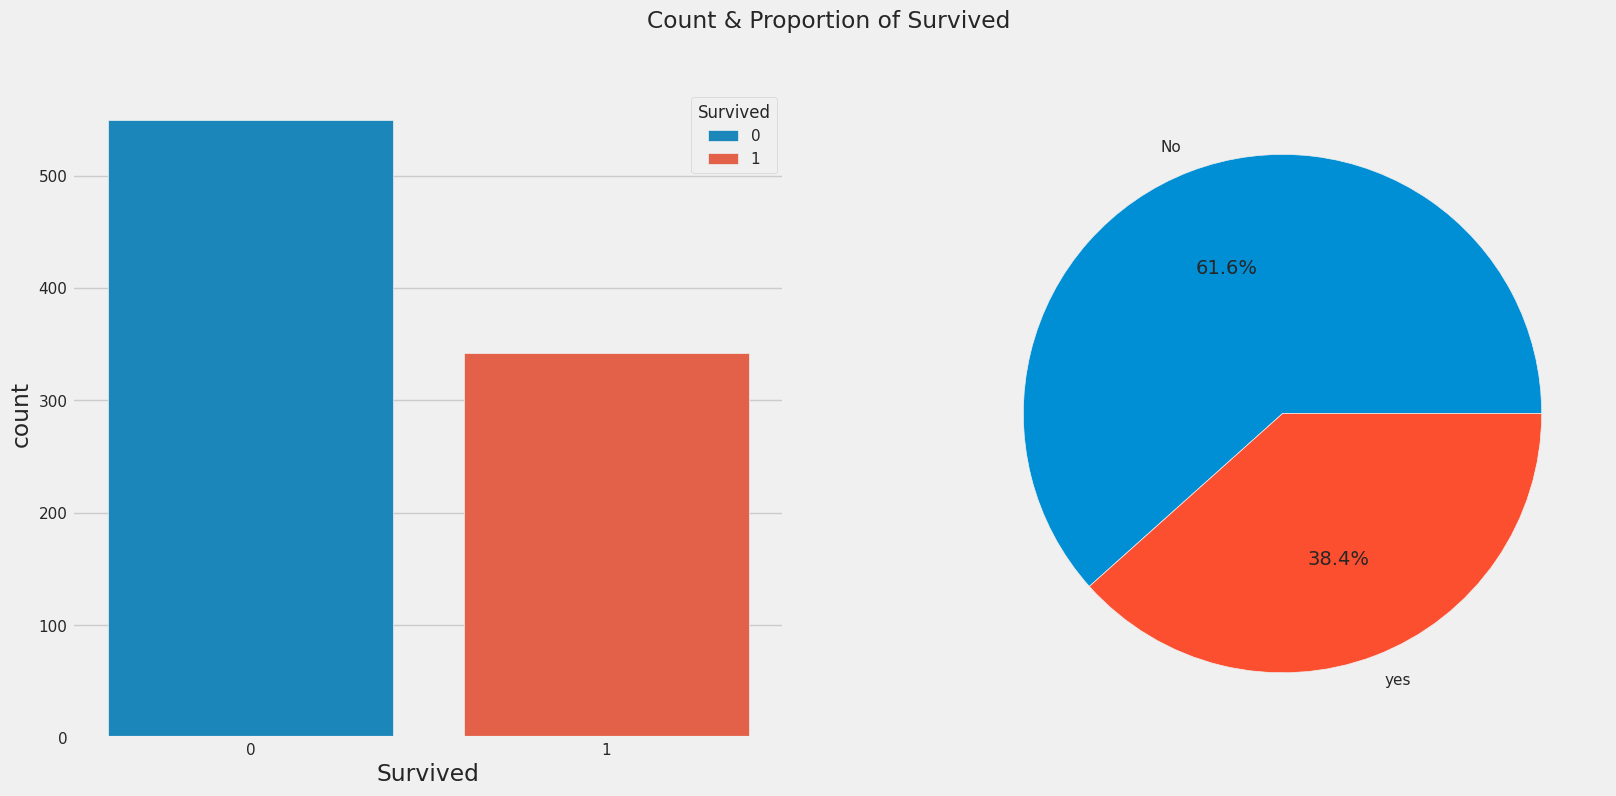

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Count & Proportion of Survived')

sns.countplot(data=df, x='Survived',hue='Survived', ax=axes[0]);

axes[1].pie(df['Survived'].value_counts(), labels=['No', 'yes'], autopct='%1.1f%%')

plt.show()

## Type Of Features

### Categorical Features:

*A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.*

**Categorical Features in the dataset: `Sex, Embarked.`**

### Ordinal Features:

*An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.*

**Ordinal Features in the dataset: `PClass`.**

### Continuous Feature:

*A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.*

**Continous Features in the dataset: `Age`**

## Analysing The Features

`Sex` --> Categorical Feature

In [9]:
print(df.groupby(['Sex', 'Survived'], as_index=True)['Survived'].count())

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


In [10]:
df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


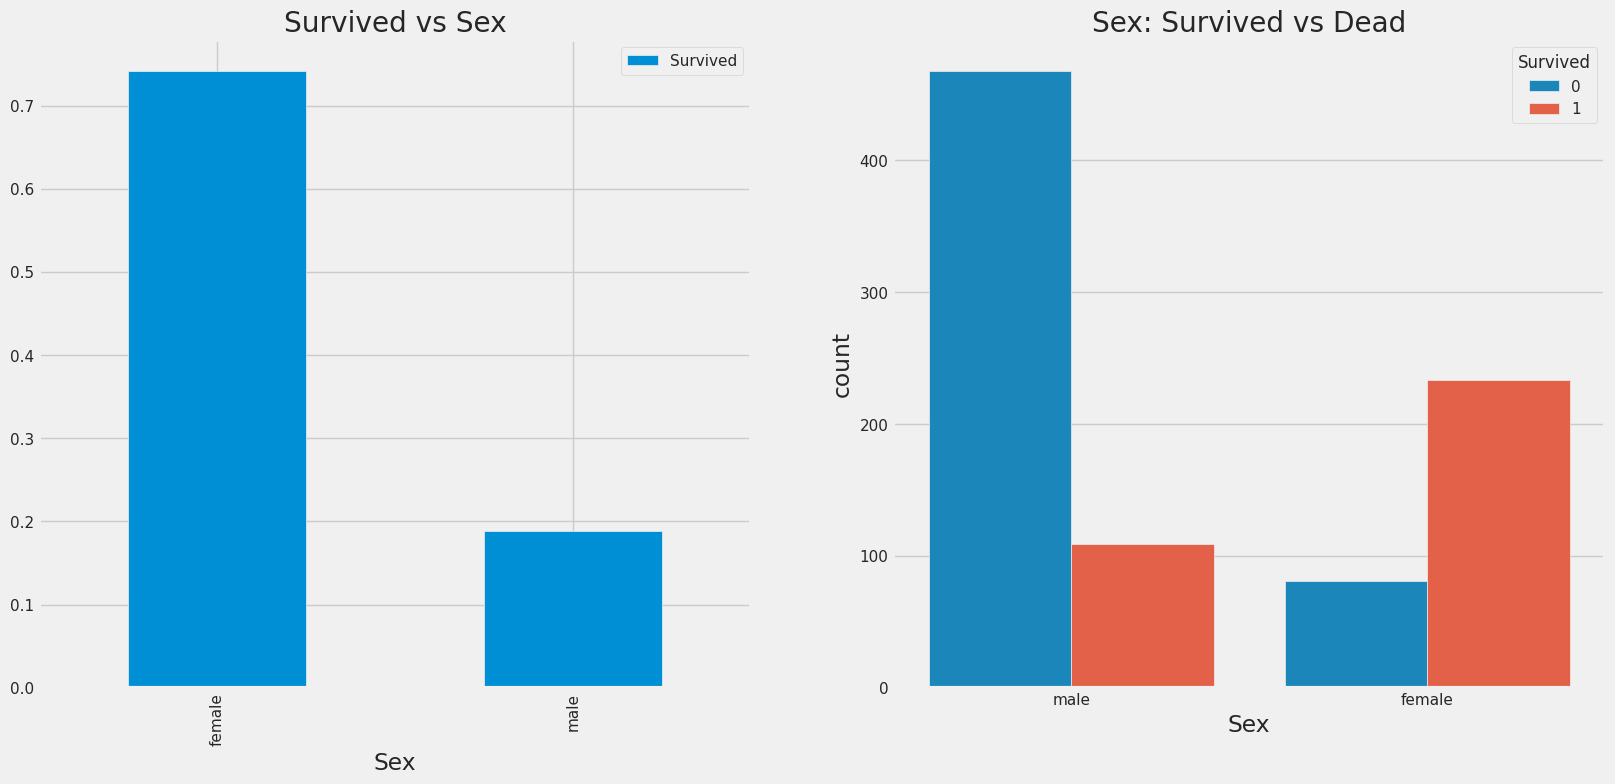

In [11]:
# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=axes[0])
axes[0].set_title('Survived vs Sex')

sns.countplot(
  data=df,
  ax=axes[1],
  x='Sex',
  hue='Survived'
)
axes[1].set_title('Sex: Survived vs Dead')

plt.show()

`Pclass` --> Ordinal Feature

In [12]:
pd.crosstab(df['Pclass'], df['Survived'], margins=True).style.background_gradient(cmap='YlOrRd')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


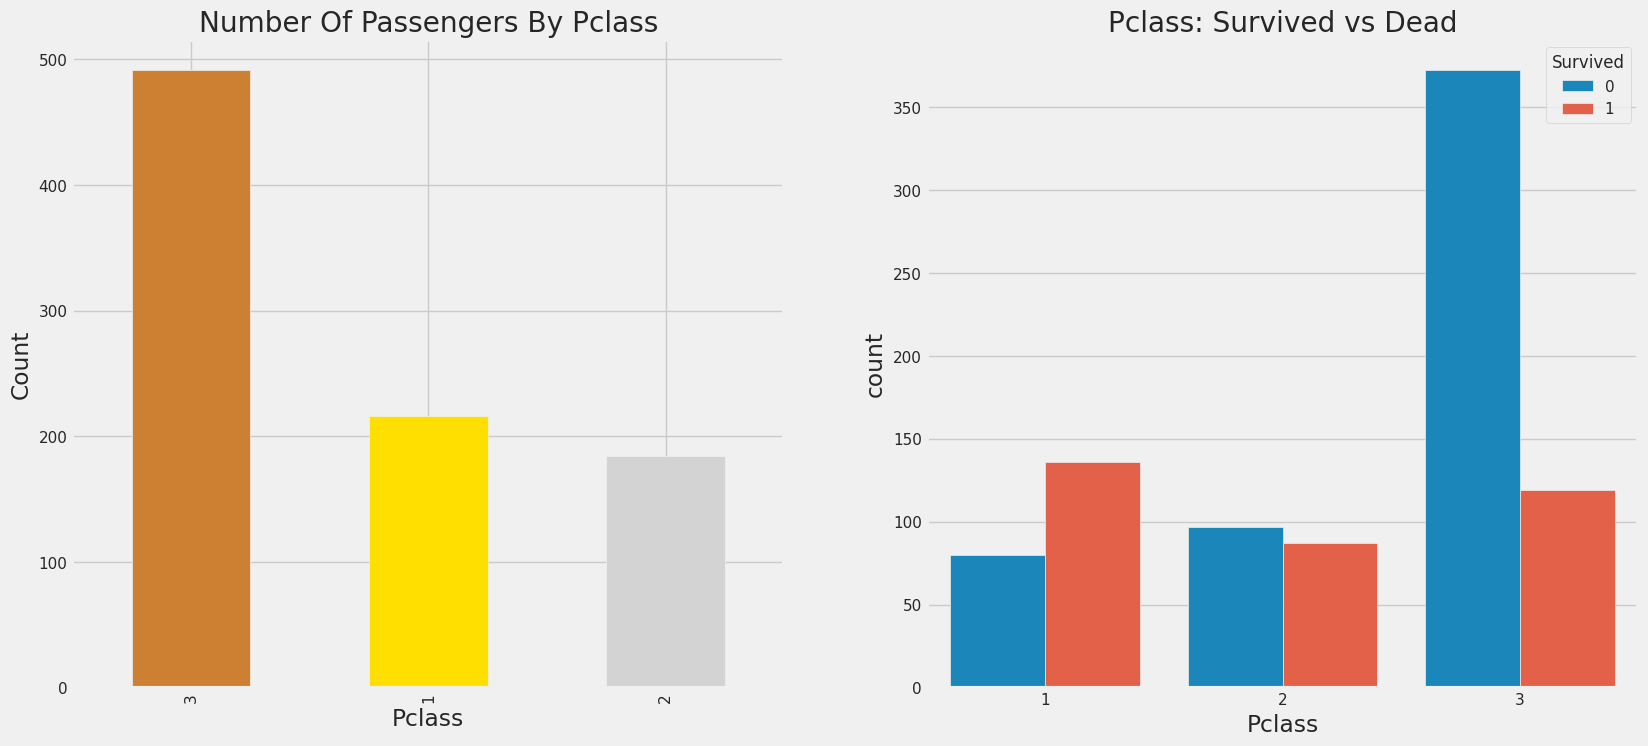

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(
  data=df,
  ax=ax[1],
  x='Pclass',
  hue='Survived'
)

ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

In [14]:
pd.crosstab([df['Sex'], df['Survived']], df['Pclass'], margins=True).style.background_gradient(cmap='YlOrRd')

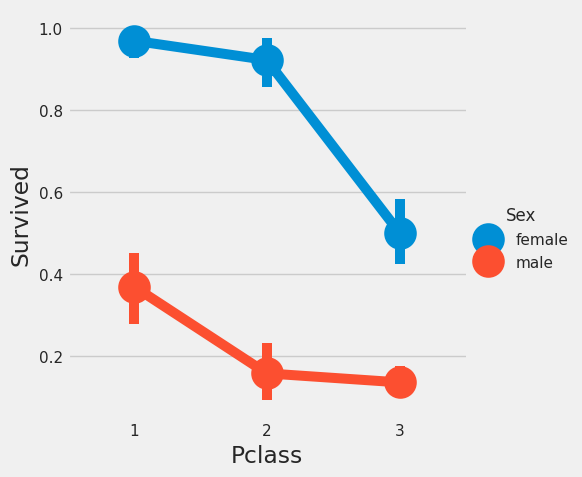

In [15]:
sns.catplot(kind='point', data=df, x='Pclass', y='Survived', hue='Sex');

`Age` --> Continuous Feature

In [16]:
print("Oldest Passenger was of: ", df['Age'].max(), 'Years')
print("Youngest Passenger was of: ", df['Age'].min(), 'Years')
print("Average Age on the ship:", df['Age'].mean(), 'Years')

Oldest Passenger was of:  80.0 Years
Youngest Passenger was of:  0.42 Years
Average Age on the ship: 29.69911764705882 Years


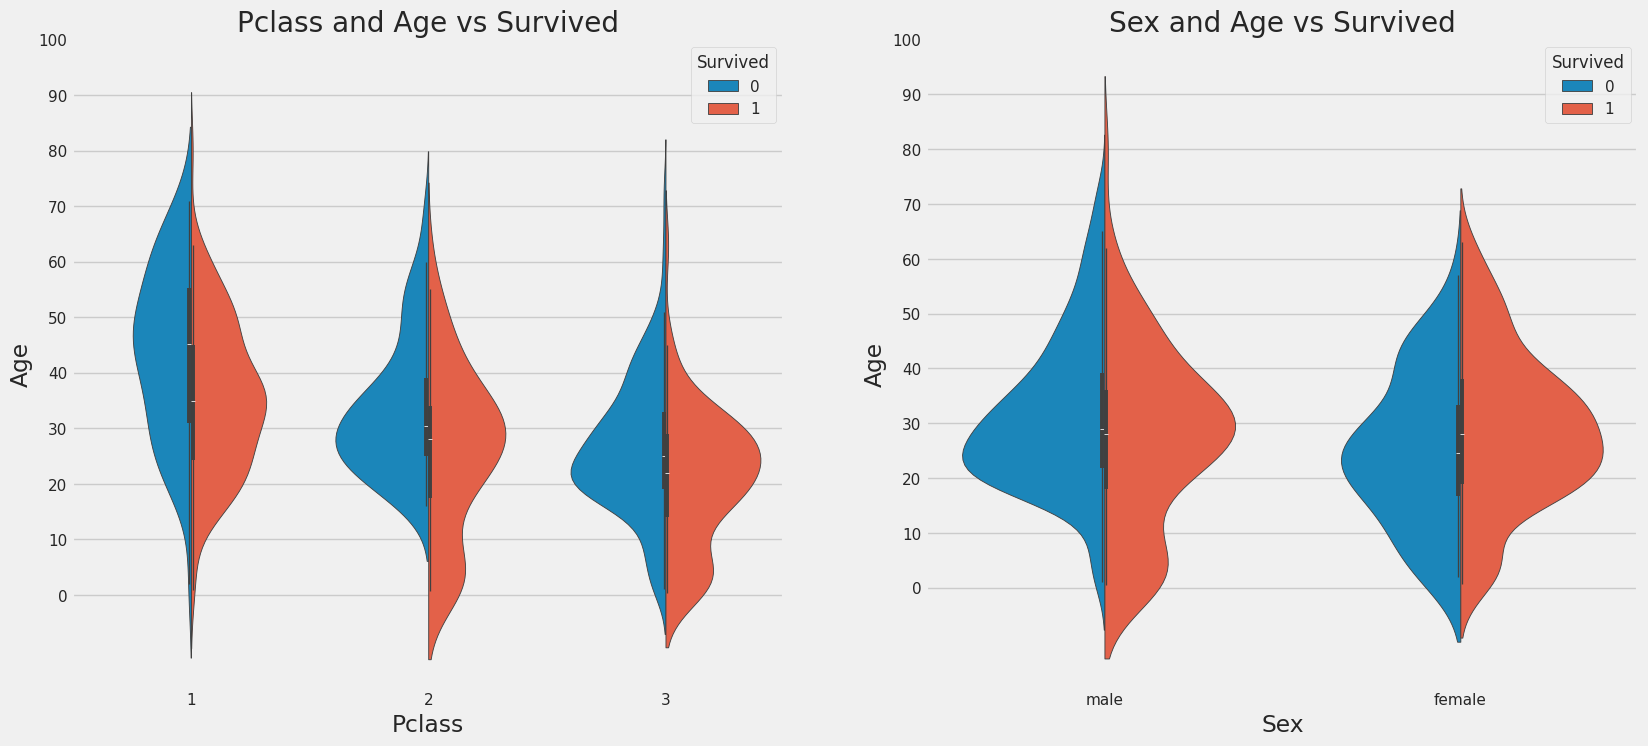

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot(
  data=df,
  ax=ax[0],
  x='Pclass',
  y='Age',
  hue='Survived',
  split=True
)
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(data=df, ax=ax[1], x='Sex', y='Age', hue='Survived', split=True)
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

Observations:

1. The number of children increases with Pclass & the survival rate

As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

`Bingo!!!!`, we can check the `Name` feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

**What's In a name?? ---> Feature**

In [18]:

df['Initial'] = 0

for i in df:
  df['Initial'] = df['Name'].str.extract('([A-Za-z]+)\.')
# Lets extract the Saludations

In [19]:
df['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

Okay so here we are using the Regex: `[A-Za-z]+)..` So what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot). So we successfully extract the Initials from the Name.

In [20]:
# Checking the Initials with the Sex

pd.crosstab(df['Initial'], df['Sex']).T.style.background_gradient(cmap='YlOrRd')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [21]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'], ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [22]:
# lets check the average age by Initial

df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Flling NaN Age

In [23]:
# Assing the NaN Values with the Ceil values of the mean ages

df.loc[(df['Age'].isnull()) & (df['Initial'] == 'Mr'), 'Age'] = 33
df.loc[(df['Age'].isnull()) & (df['Initial'] == 'Mrs'), 'Age'] = 36
df.loc[(df['Age'].isnull()) & (df['Initial'] == 'Master'), 'Age'] = 5
df.loc[(df['Age'].isnull()) & (df['Initial'] == 'Miss'), 'Age'] = 22
df.loc[(df['Age'].isnull()) & (df['Initial'] == 'Other'), 'Age'] = 46

In [24]:
# So no null values left finally
df['Age'].isna().any()

False

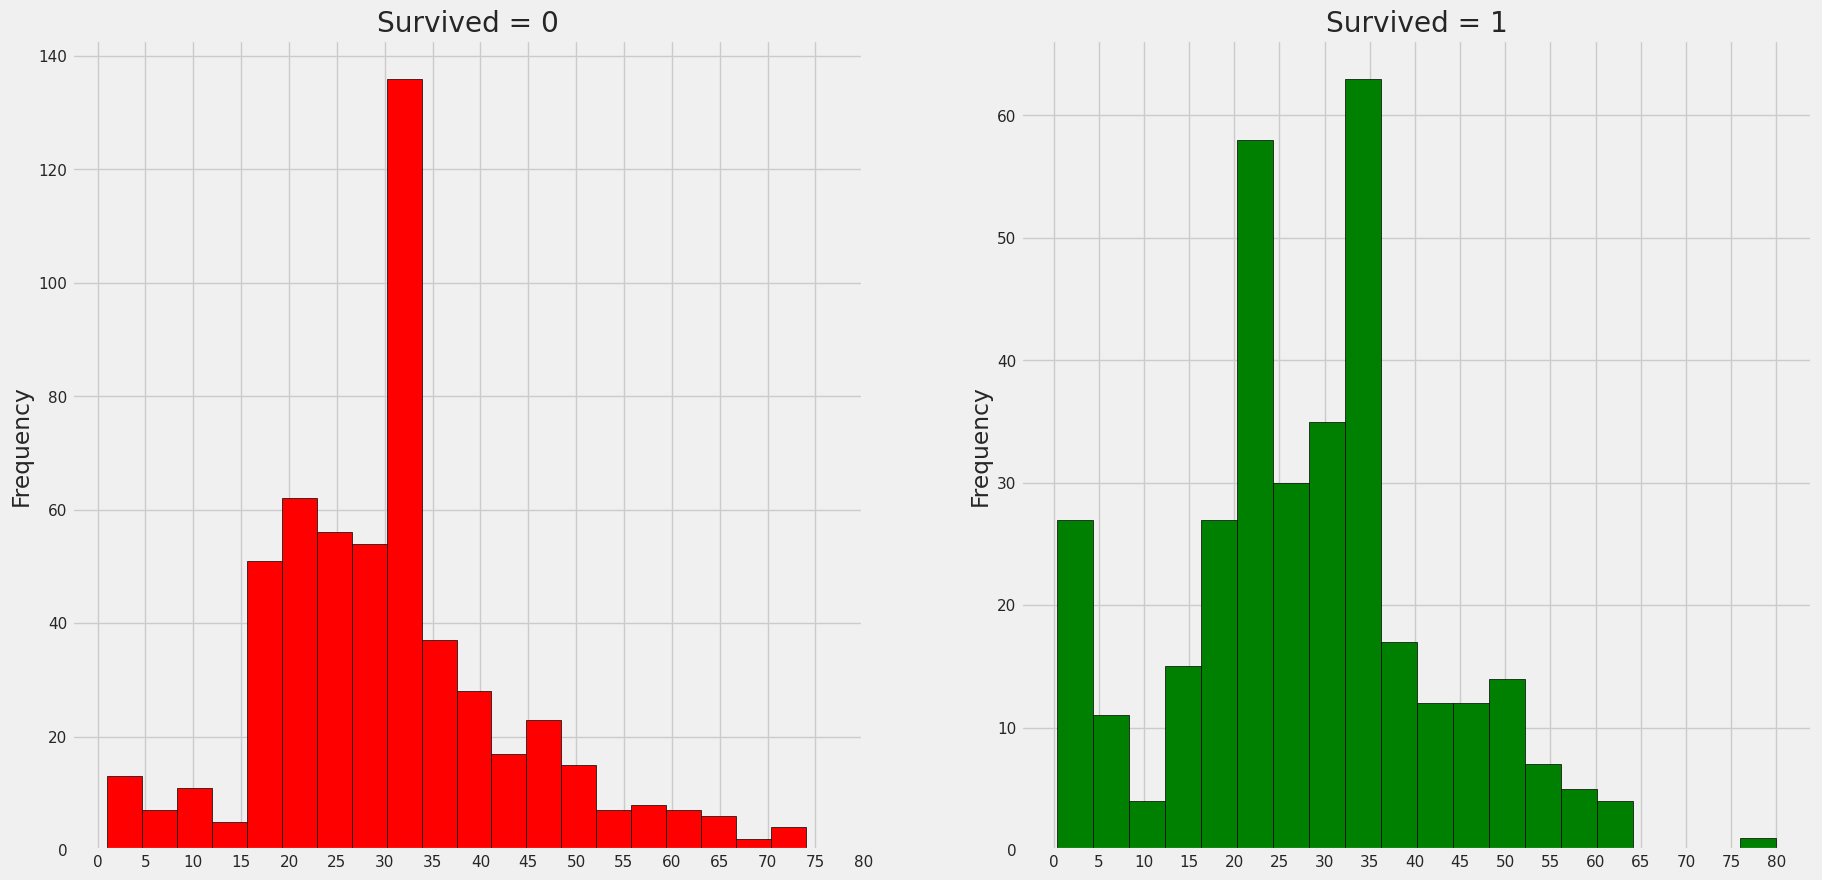

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

df[df['Survived'] == 0]['Age'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')

x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

df[df['Survived'] == 1]['Age'].plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')

ax[1].set_title('Survived = 1')

x2 = list(range(0, 85, 5))

ax[1].set_xticks(x2)

plt.show()

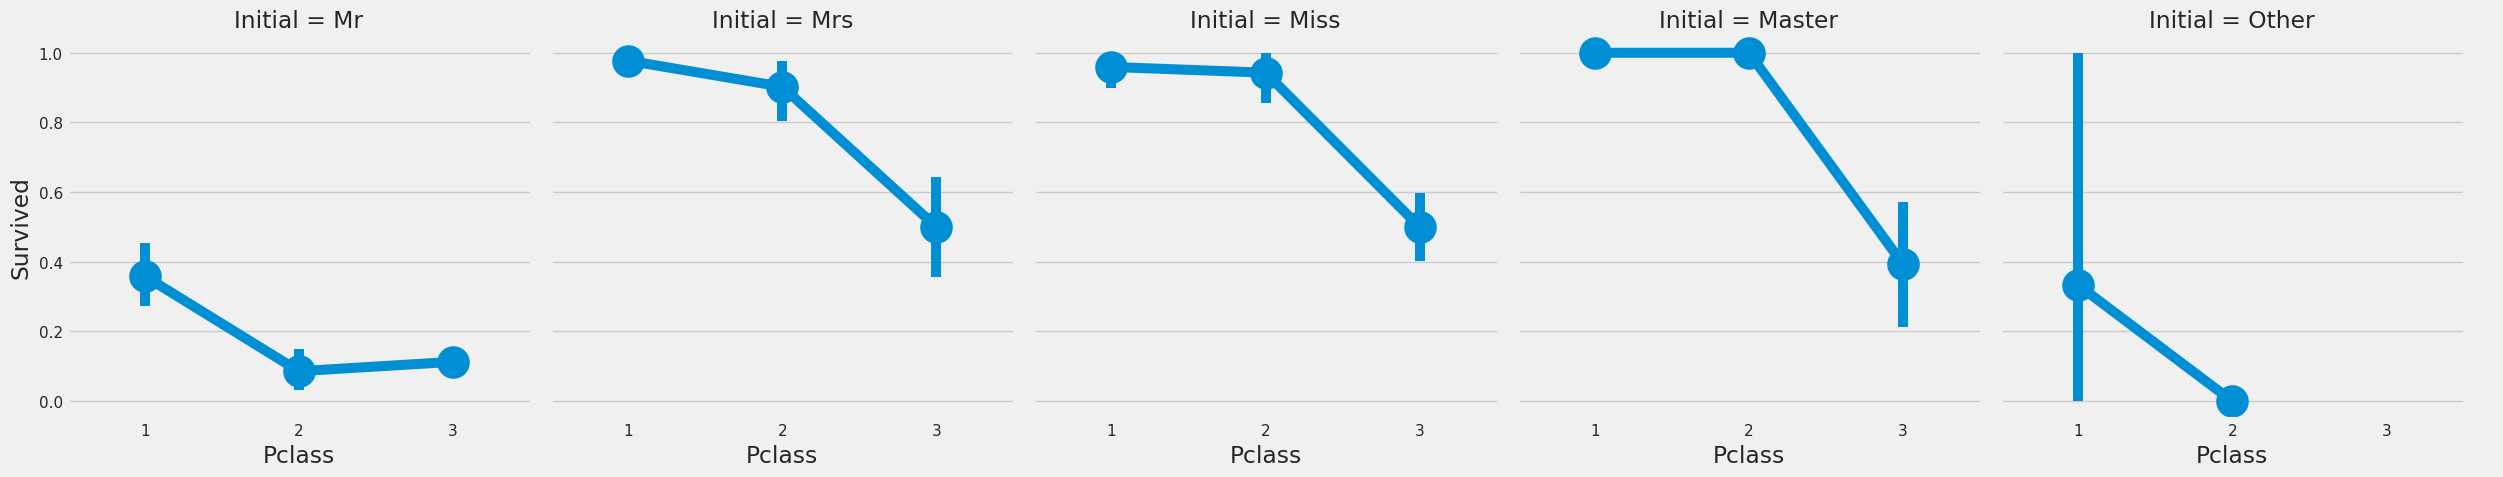

In [26]:
sns.catplot(kind='point', data=df, x='Pclass', y='Survived', col='Initial');

The Women and Child first policy thus holds true irrespective of the class.

`Embarked` --> Categorical Value

In [27]:
pd.crosstab([df['Embarked'], df['Pclass']], [df['Sex'], df['Survived']], margins=True).style.background_gradient(cmap='YlOrRd')

Chance for Survival by Port of Embarkation

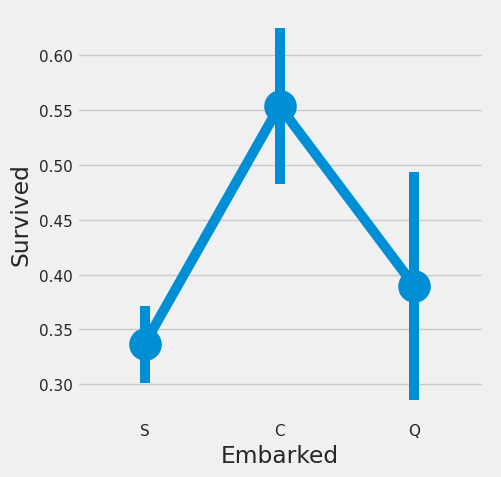

In [28]:
sns.catplot(kind='point', data=df, x='Embarked', y='Survived');

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

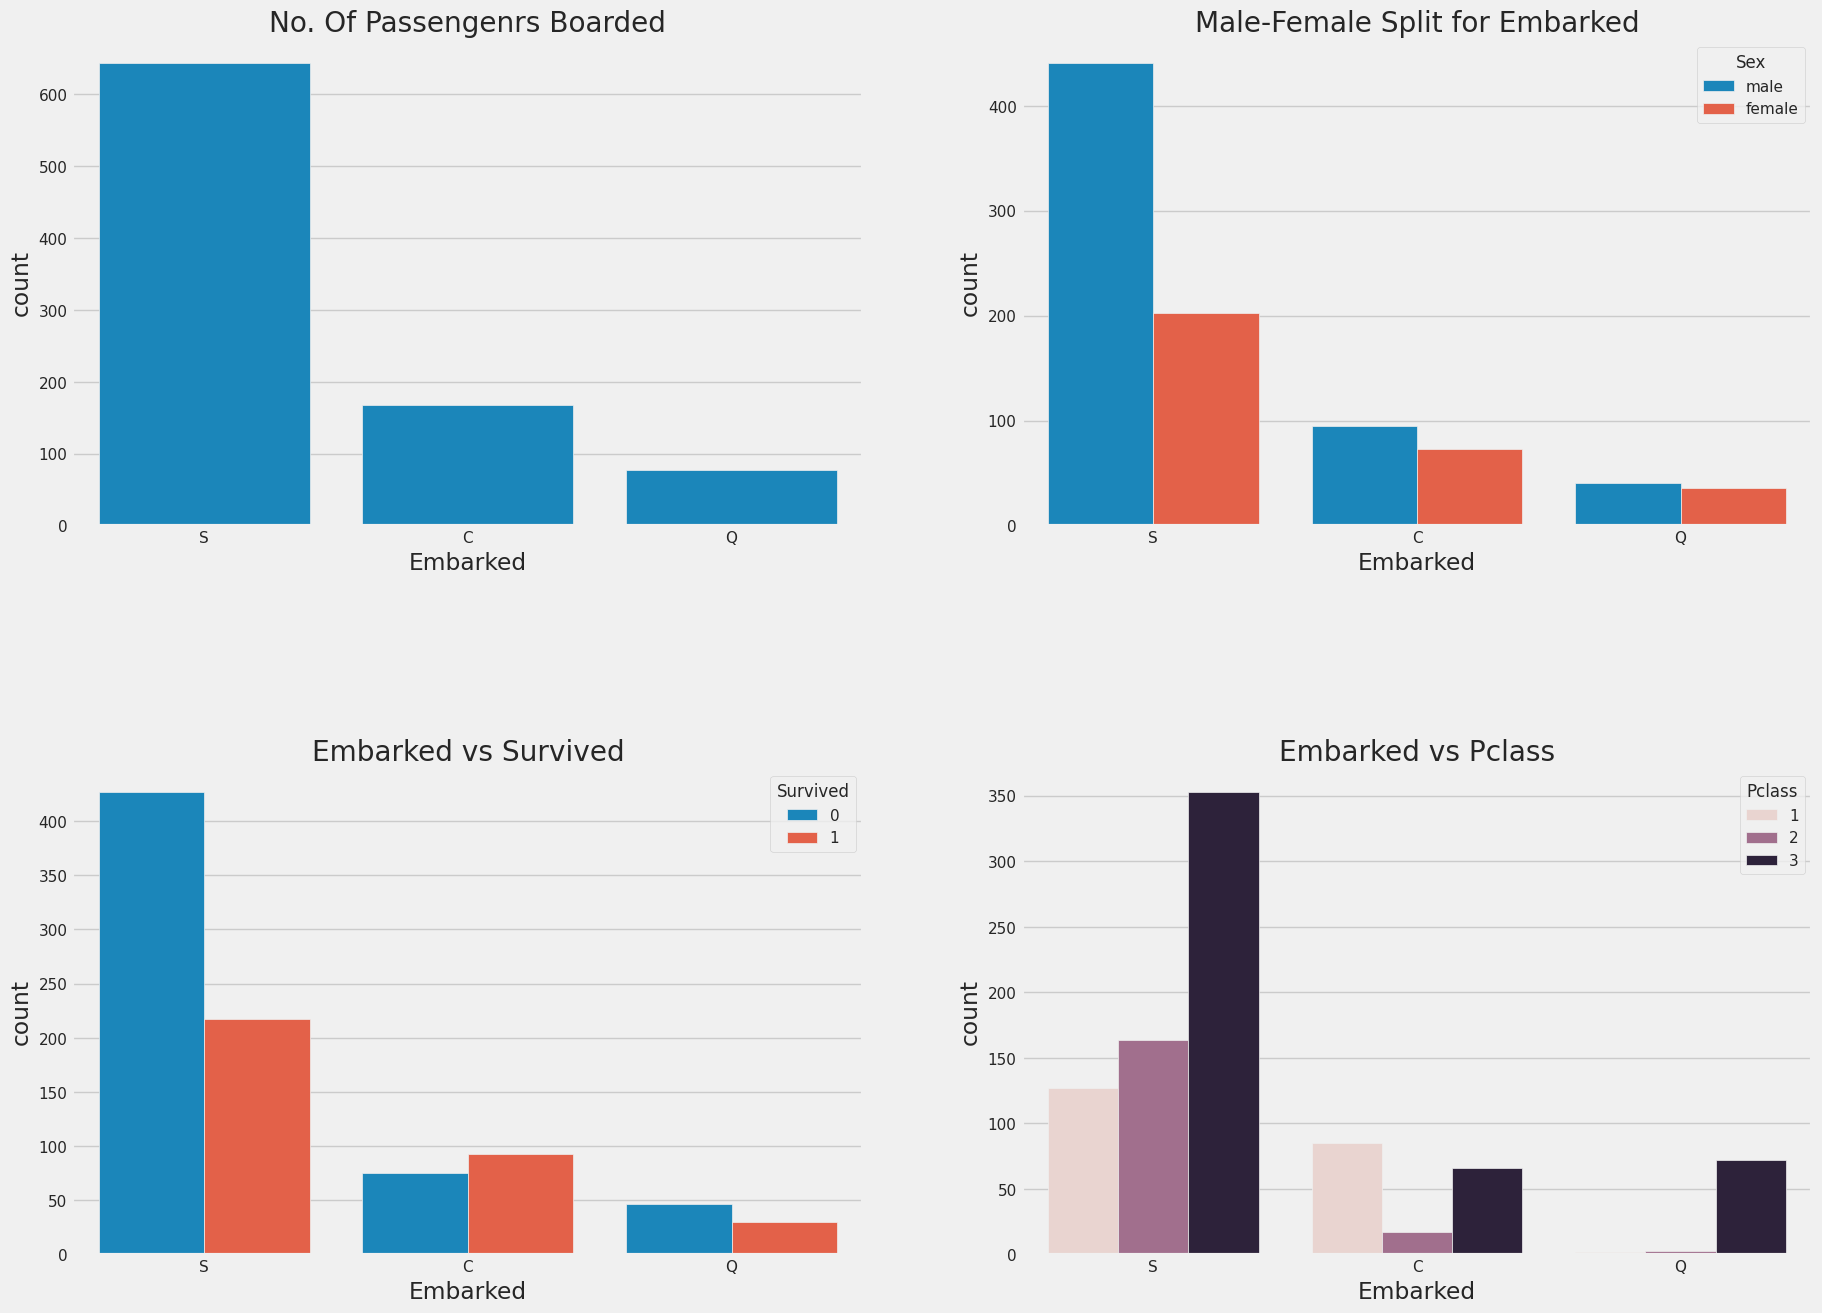

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(data=df, x='Embarked', ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengenrs Boarded')

sns.countplot(data=df, x='Embarked', hue='Sex', ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot(data=df, x='Embarked', hue='Survived', ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')


sns.countplot(data=df, x='Embarked', hue='Pclass', ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

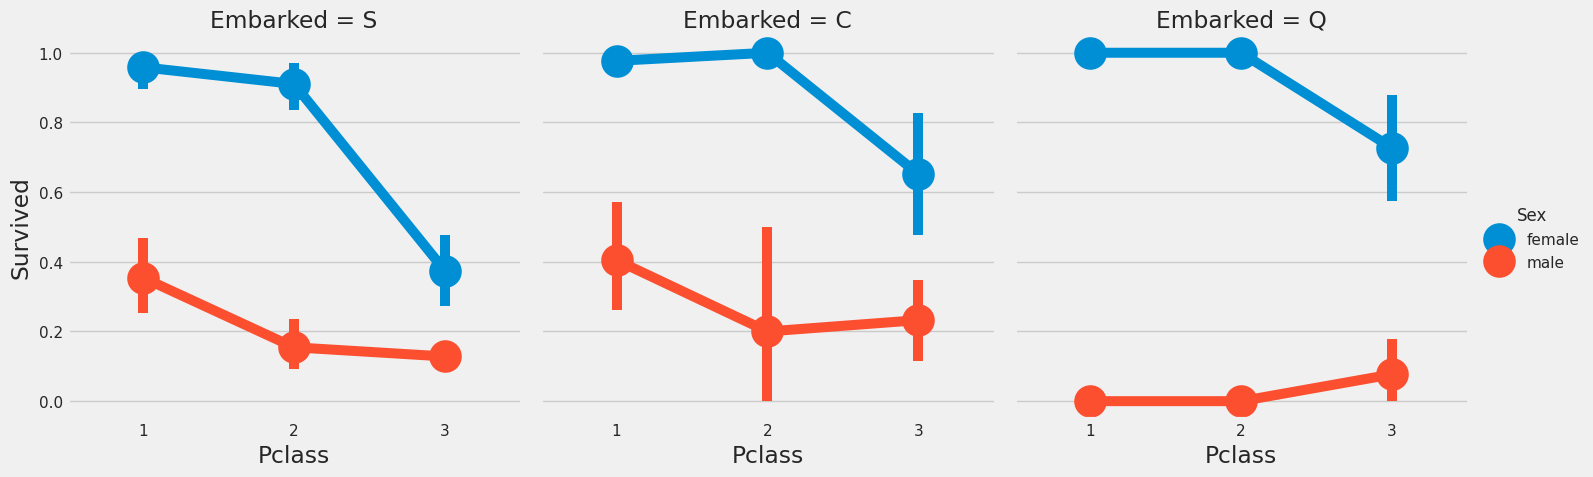

In [30]:
sns.catplot(kind='point', data=df, x='Pclass', y='Survived', col='Embarked', hue='Sex');

Flling Embarked NaN

as we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [31]:
df['Embarked'].fillna('S', inplace=True)

In [32]:
# Finally No NaN values
df['Embarked'].isna().any()

False

`SibSip` --> Discrete Feature

This feature represents whether a person is alone or with his family members.

Sibling = brother, sister, stepbrother, stepsister.

Spouse = Husband, wife

In [33]:
pd.crosstab([df['SibSp']], df['Survived']).style.background_gradient(cmap='YlOrRd')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


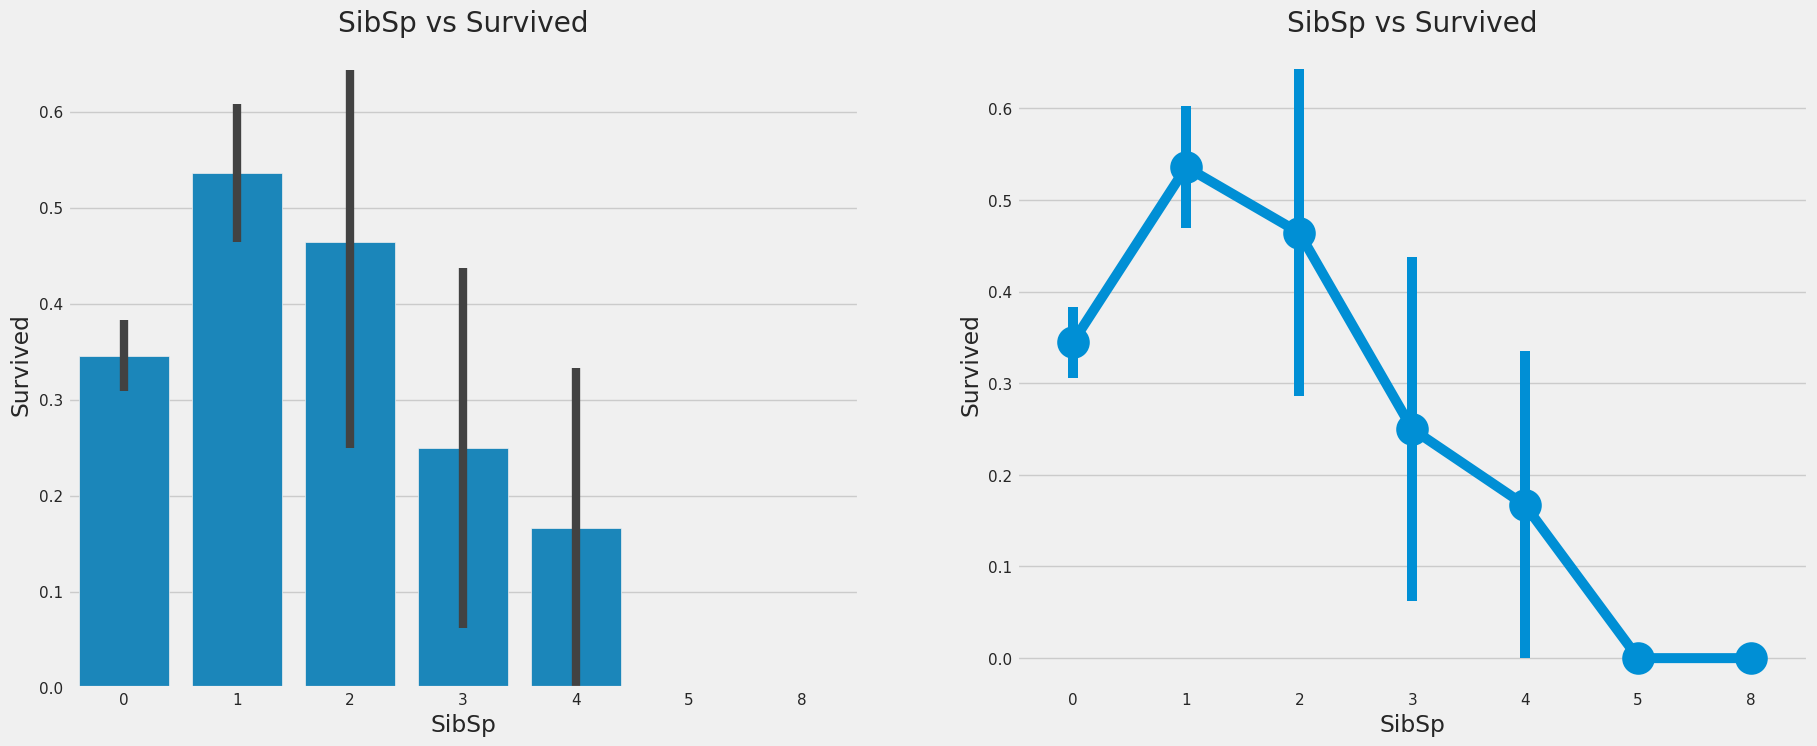

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(data=df, ax=ax[0], x='SibSp', y='Survived')

ax[0].set_title('SibSp vs Survived')

sns.pointplot(data=df, x='SibSp', y='Survived', ax=ax[1]);

ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

In [35]:
pd.crosstab(df['SibSp'], df['Pclass']).style.background_gradient(cmap='YlOrRd')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Parch

In [36]:
pd.crosstab(df['Parch'], df['Pclass']).style.background_gradient(cmap='YlOrRd')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3.

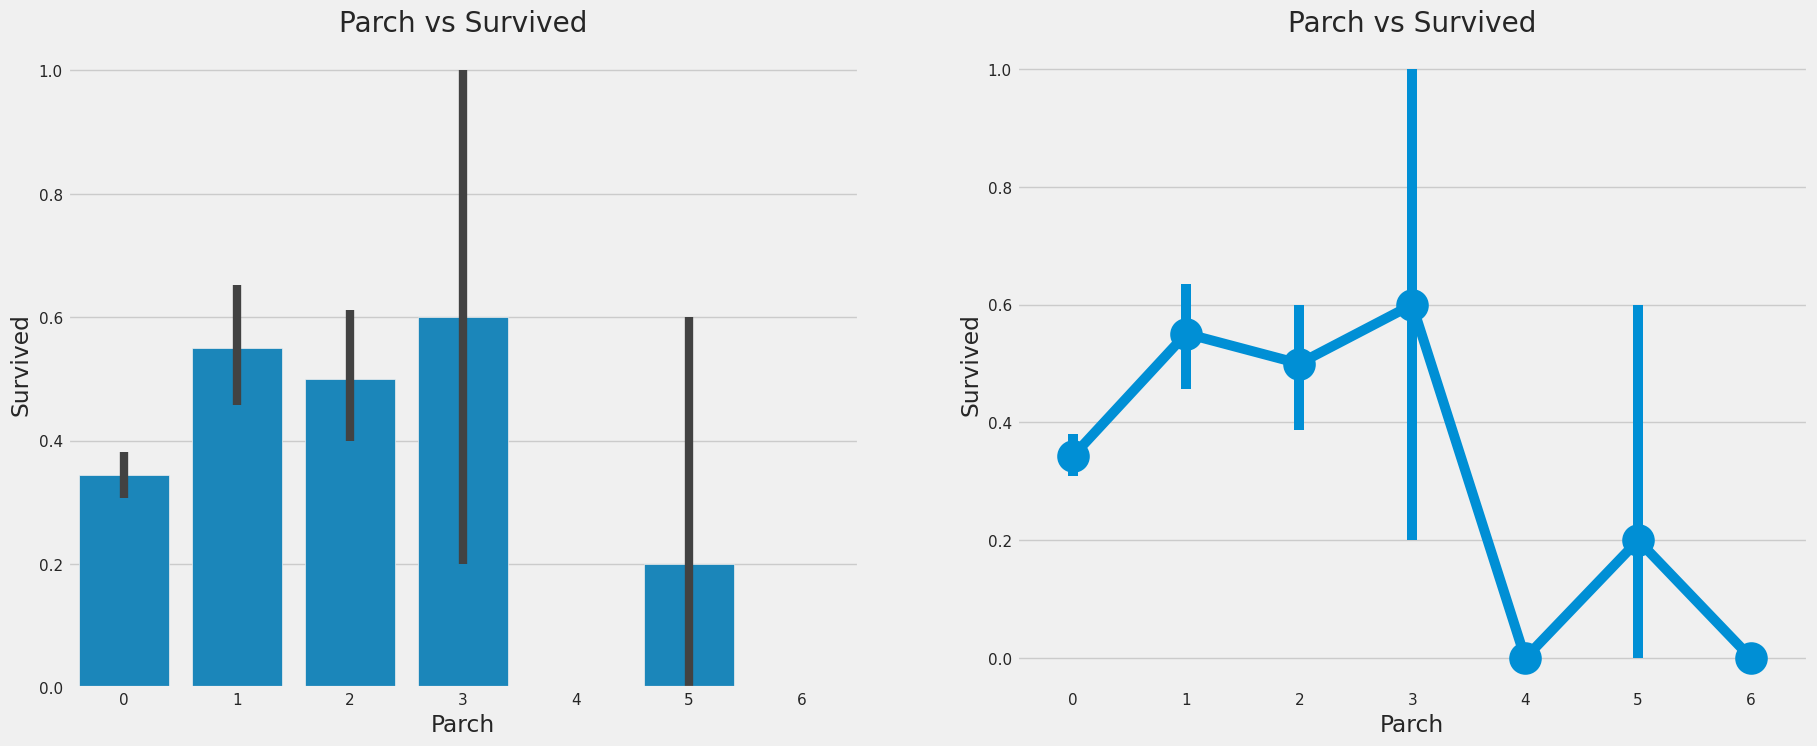

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(data=df, ax=ax[0], x='Parch', y='Survived')
ax[0].set_title('Parch vs Survived')

sns.pointplot(data=df, x='Parch', y='Survived', ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

`Fare` --> Continous Feature

In [38]:
print('Highest Fare was:', df['Fare'].max())
print('Lowest Fare was:', df['Fare'].min())
print('Average Fare was:', df['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


The lowest fare is **0.0.** Wow!! a free luxorious ride.

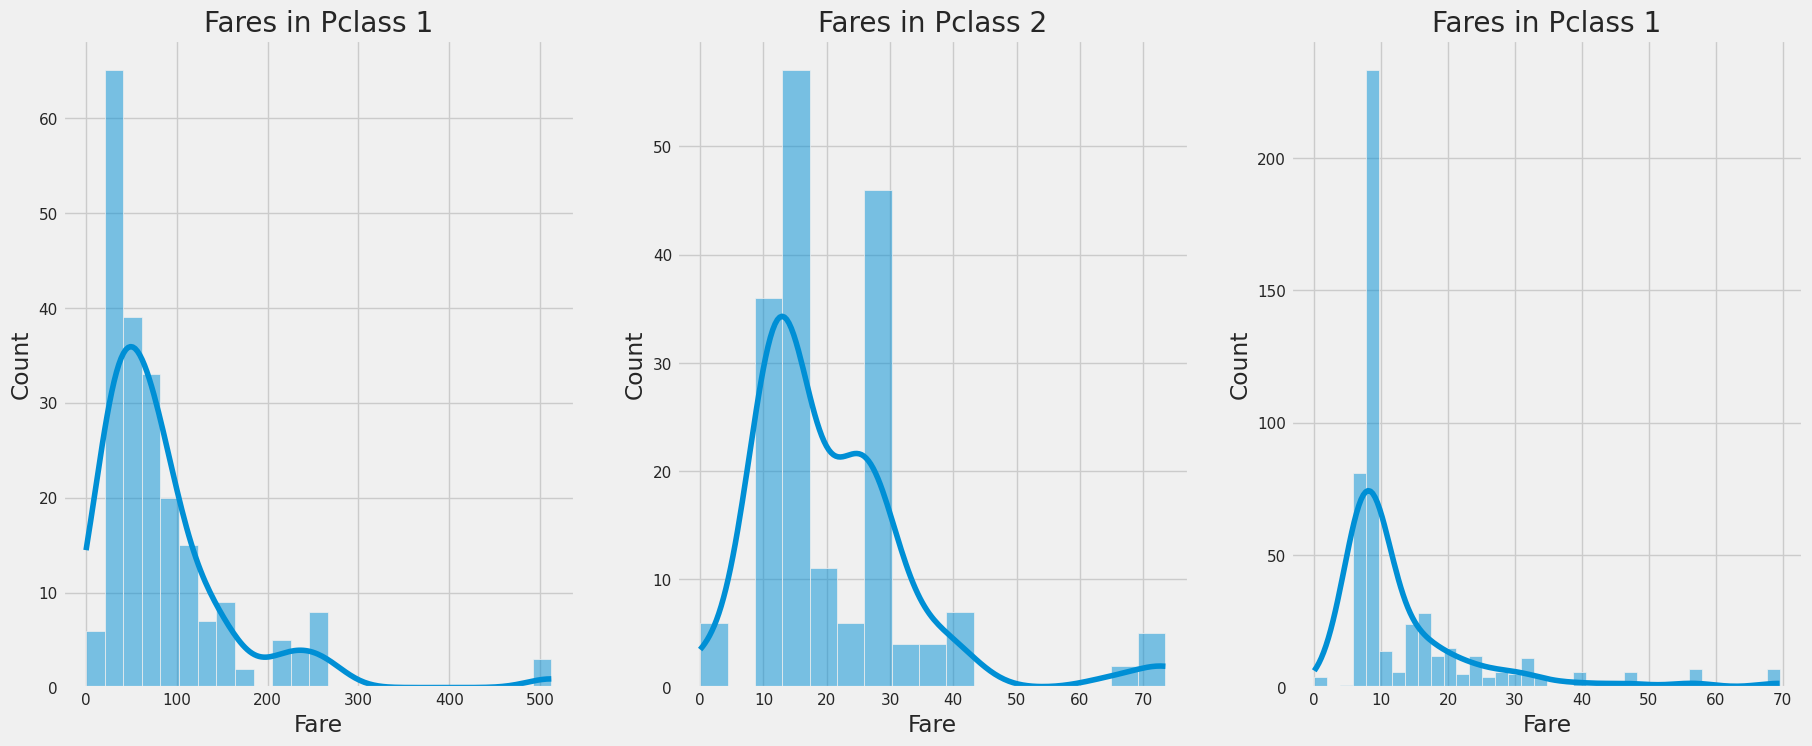

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.histplot(
  data=df[df['Pclass'] == 1]['Fare'],
  ax=ax[0],
  kde=True
)
ax[0].set_title('Fares in Pclass 1')

sns.histplot(
  data=df[df['Pclass'] == 2]['Fare'],
  ax=ax[1],
  kde=True
)
ax[1].set_title('Fares in Pclass 2')
sns.histplot(
  data=df[df['Pclass'] == 3]['Fare'],
  ax=ax[2],
  kde=True
)
ax[2].set_title('Fares in Pclass 1')

plt.show()

Observations in a Nutshell for all features:

**Sex:** The chance of survival for women is high as compared to men.

**Pclass:** There is a visible trend that being a **1st class passenger** gives you better chances of survival. The survival rate for **Pclass3 is very low.**  For **women**, the chance of survival from **Pclass1** is almost 1 and is high too for those from **Pclass2. Money Wins!!!.**


**Age**: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked:** This is a very interesting feature. **The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S.** Passengers at Q were all from **Pclass3.**

**Parch+SibSp:** Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

## Correlation Between The Features

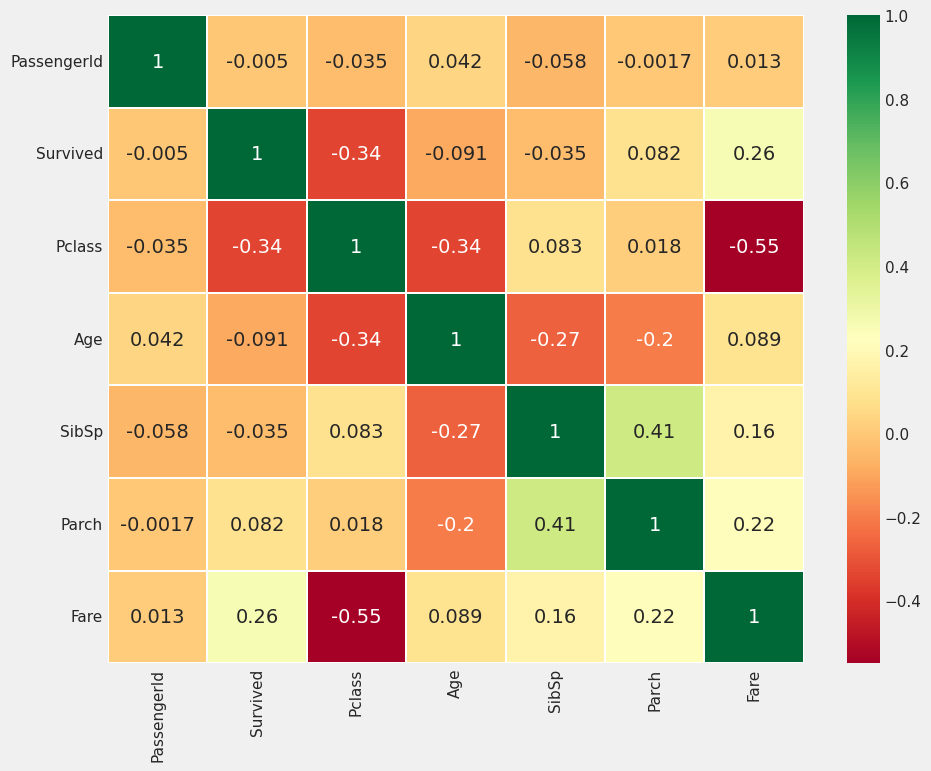

In [48]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', linewidths=0.2)

fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

Interpreting the HeatMap


The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.


**POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.**

**NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.**

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.



